In [98]:
#import les libraries d'analyse et notre Data Set> le fichier History

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
Data= pd.read_csv("History.csv", "," )

In [2]:
# Analyses préalables du Data Set

In [3]:
Data.shape

(520, 3)

In [4]:
Data.head()

,DATE,ITEM,SALES
0,02-01-2019,A,113
1,03-01-2019,A,143
2,04-01-2019,A,145
3,05-01-2019,A,167
4,06-01-2019,A,202


In [5]:
Data.dtypes

DATE     object
ITEM     object
SALES     int64
dtype: object

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    520 non-null    object
 1   ITEM    520 non-null    object
 2   SALES   520 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 12.3+ KB


In [7]:
Data.describe()

,SALES
count,520.000000
mean,98.207692
std,61.444707
min,0.000000
25%,48.000000
50%,87.000000
75%,143.000000
max,282.000000


In [8]:
Data.nunique

<bound method DataFrame.nunique of            DATE ITEM  SALES
0    02-01-2019    A    113
1    03-01-2019    A    143
2    04-01-2019    A    145
3    05-01-2019    A    167
4    06-01-2019    A    202
..          ...  ...    ...
515  25-12-2019    B     96
516  26-12-2019    B     85
517  27-12-2019    B     87
518  28-12-2019    B     79
519  29-12-2019    B     76

[520 rows x 3 columns]>

In [9]:
#recherche des valeurs NULL ou manquantes > notre Data Set n'en dispose pas

In [10]:
Data.isna().sum()

DATE     0
ITEM     0
SALES    0
dtype: int64

<AxesSubplot:>

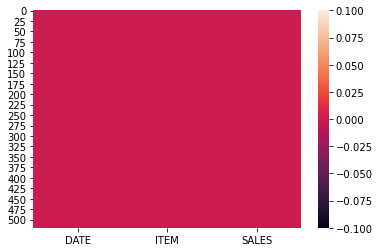

In [11]:
sns.heatmap(Data.isna())

In [12]:
#l'objectif est maintenant de regrouper le Data Set par ITEM, A et B pour faciliter l'analyse en fontion de l'index DATE 

In [13]:
Data.groupby('ITEM').count()

,DATE,SALES
ITEM,,
A,260,260
B,260,260


In [14]:
Data_A=Data[:260]
Data_B=Data[260:]

In [15]:
df12 = pd.merge(df1, df2, on='DATE', how='inner', suffixes=(' A',' B'))

NameError: name 'df1' is not defined

In [ ]:
df12.head()

In [16]:
d

NameError: name 'd' is not defined

In [17]:
#df.iloc[0:125]

In [18]:
df.hist()

NameError: name 'df' is not defined

In [19]:
# collecte des infos  sur Dataset

In [20]:
Data.shape

(520, 3)

In [21]:
Data.dtypes.value_counts()

object    2
int64     1
dtype: int64

In [22]:
#les valeurs répetées

In [23]:
Data.duplicated().sum()

0

In [24]:
#les valeurs manquantes

DATE     0
ITEM     0
SALES    0
dtype: int64

In [23]:
#données du Dataset & analyse exploratoire (EDA)

In [24]:
Data_A.DATE= pd.to_datetime(Data_A.DATE)
Data_B.DATE= pd.to_datetime(Data_B.DATE)
parse_dates=True
df1=Data_A.set_index('DATE')
df2=Data_B.set_index('DATE')

C:\Users\perso\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [26]:
# il est possible de faire la concaténation des deux data frame au lieu de merge
#pd.concat([df1,df2], axis=1)

In [28]:
df12.shape

(260, 4)

In [29]:
df12.columns

Index(['ITEM A', 'SALES A', 'ITEM B', 'SALES B'], dtype='object')

<AxesSubplot:xlabel='DATE'>

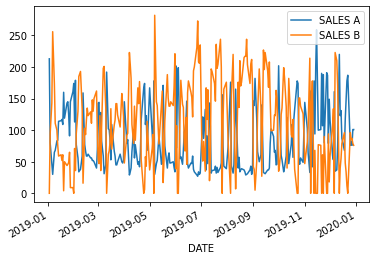

In [30]:
df12.plot()

In [31]:
#analyse inivariée, séparation des valeurs A et B

In [32]:
df12['MOIS'] =df12.index.month

<AxesSubplot:xlabel='MOIS'>

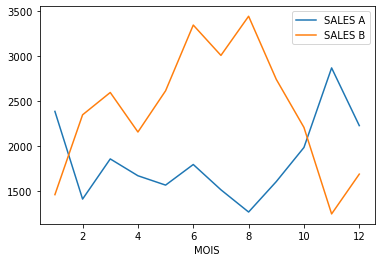

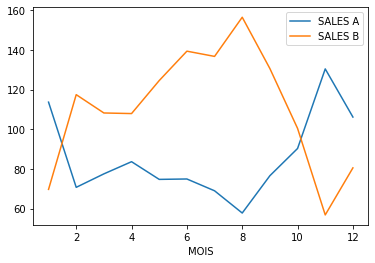

In [33]:
df12.groupby(['MOIS']).sum().plot()
df12.groupby(['MOIS']).mean().plot()

In [34]:
df12['Cumul ventes']= df12['SALES A']+df12['SALES B']

<AxesSubplot:xlabel='MOIS'>

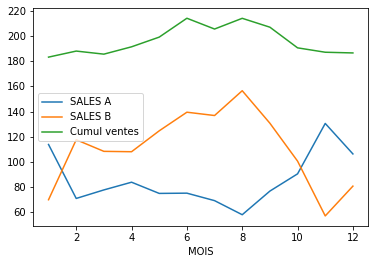

In [35]:
df12.groupby(['MOIS']).mean().plot()

In [36]:
df12.corr()

,SALES A,SALES B,MOIS,Cumul ventes
SALES A,1.000000,-0.914377,0.111039,-0.411855
SALES B,-0.914377,1.000000,-0.050460,0.745522
MOIS,0.111039,-0.050460,1.000000,0.069219
Cumul ventes,-0.411855,0.745522,0.069219,1.000000


In [37]:
#question 1 nous pouvons dire que la demande des deux produits A et B ..sont évolutive en fonction de la saison, de octobre à mi janvier le produit A génère le plus de vente
# A partir de la 2eme quizaine de janvier et jusqu'à fin septembre le produit B sera l'article le plus vendus
#la plus grosse part des ventes se réalise entre Juin et septembre et il s'agit du produit B 
#plus largement sur l'année, le produit B profite d'une corrélation de 75% sur les ventes cumulées

In [38]:
df12['JOUR'] =df12.index.day_name()

In [39]:
df12['WE'] = df12.day_name.isin(['Sunday','Saturday' ])

AttributeError: 'DataFrame' object has no attribute 'day_name'

In [ ]:
#df.drop(columns=['day_name'])

In [40]:
df12.head()

,ITEM A,SALES A,ITEM B,SALES B,MOIS,Cumul ventes,JOUR
DATE,,,,,,,
2019-02-01,A,113,B,71,2,184,Friday
2019-03-01,A,143,B,54,3,197,Friday
2019-04-01,A,145,B,48,4,193,Monday
2019-05-01,A,167,B,37,5,204,Wednesday
2019-06-01,A,202,B,39,6,241,Saturday


In [41]:
#df12.groupby(['JOUR']).hist()

In [42]:
df.head()

,ITEM,SALES
DATE,,
2019-02-01,A,113
2019-03-01,A,143
2019-04-01,A,145
2019-05-01,A,167
2019-06-01,A,202


In [43]:
df12['SALES A'].mean(),df12['SALES B'].mean()


(85.32692307692308, 111.08846153846154)

<AxesSubplot:ylabel='Frequency'>

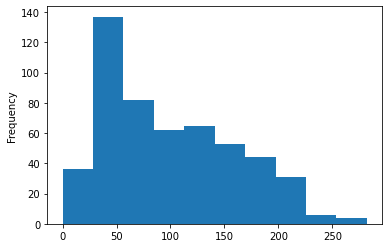

In [44]:
Data['SALES'].plot(kind='hist')

In [45]:
#analyse bivariée

In [46]:
#corr=Data.corr()
#sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns, annot=True, cmap = 'coolwarm')

<AxesSubplot:xlabel='DATE', ylabel='SALES'>

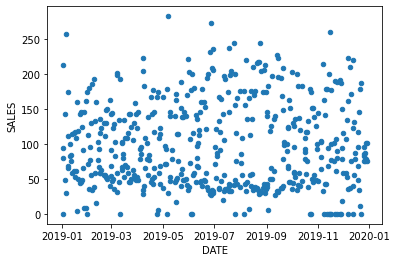

In [47]:
Data.plot(kind='scatter',x='DATE', y='SALES')

<AxesSubplot:xlabel='SALES', ylabel='ITEM'>

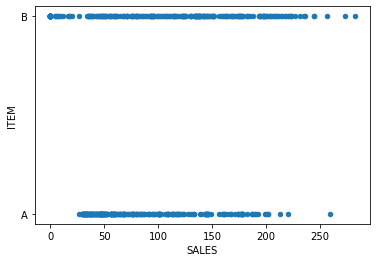

In [48]:
df.plot(kind='scatter',x='SALES', y='ITEM')

In [49]:
# moyenne des ITEMS A et B

In [50]:
df.groupby(['ITEM'])['SALES'].mean()

ITEM
A     85.326923
B    111.088462
Name: SALES, dtype: float64

In [51]:
df.groupby(['ITEM'])['SALES'].sum()

ITEM
A    22185
B    28883
Name: SALES, dtype: int64

In [52]:
#voir la saisonnalité avec groupby 
#et fonction d'aggregation

In [53]:
#decomposition = sm.tsa.seasonal_decompose(Data, model='additive')
#fig = decomposition.plot()

In [54]:
vente_A= df[df['ITEM'] == 'A']
vente_A.head()

,ITEM,SALES
DATE,,
2019-02-01,A,113
2019-03-01,A,143
2019-04-01,A,145
2019-05-01,A,167
2019-06-01,A,202


<AxesSubplot:xlabel='DATE'>

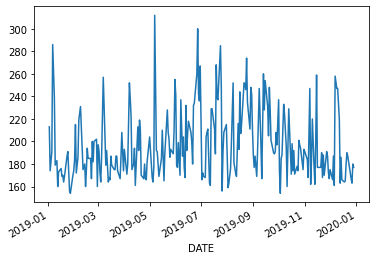

In [55]:
Data.groupby('DATE')['SALES'].agg(np.sum).plot()

<AxesSubplot:xlabel='DATE'>

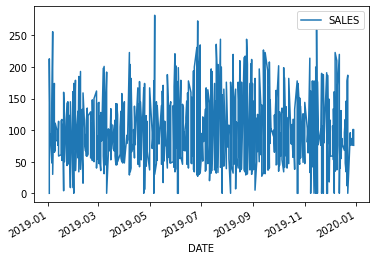

In [56]:
df.plot()

In [57]:
df_mean = df.rolling(window = 50).mean()

<AxesSubplot:xlabel='DATE'>

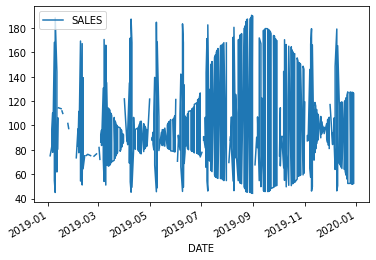

In [58]:
df_mean.plot()

In [59]:
df_M , df_S = df.resample('M').mean(),df.resample('M').sum()

(<AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>)

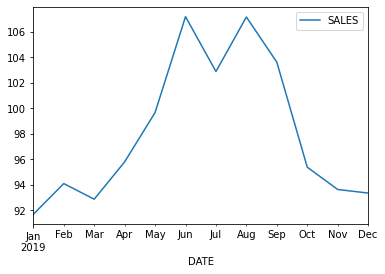

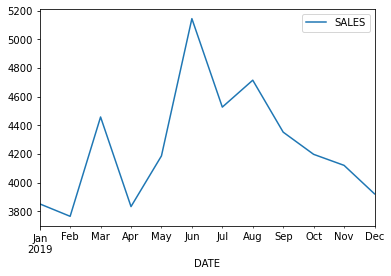

In [60]:
df_M.plot() , df_S.plot()

In [61]:
#boolean indexing Visualisation ventes

In [62]:
vente_A= df[df['ITEM'] == 'A']

In [63]:
vente_B= df[df['ITEM'] == 'B']

In [64]:
df_mean_vente_A = vente_A.rolling(window = 30).mean()
df_mean_vente_B = vente_B.rolling(window = 30).mean()

<AxesSubplot:ylabel='Frequency'>

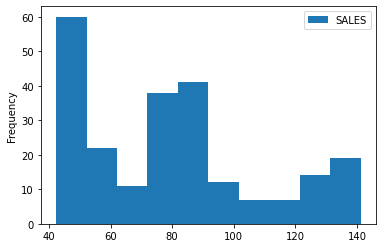

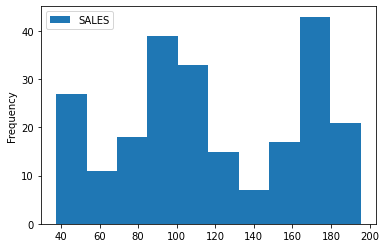

In [65]:
df_mean_vente_A.plot(kind='hist')
df_mean_vente_B.plot(kind='hist')

In [66]:
df_mean_vente_A = vente_A.resample('M').sum()
df_mean_vente_B = vente_B.resample('M').sum()

<AxesSubplot:xlabel='DATE'>

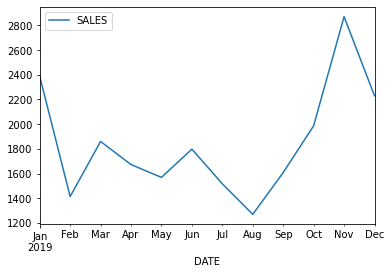

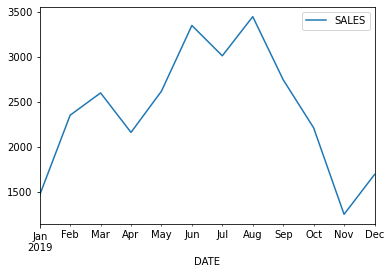

In [67]:
df_mean_vente_A.plot()
df_mean_vente_B.plot()

In [68]:
# les saisonnalités> OK, les produits > OK  

# la complétude des données> A FAIRE voir les jours de la semaines + combiner sur le mm graphe les données OK DONE